# Naive Bayes :
***Problem Statement :***
- ***Prepare a classification model using Naive Bayes for salary data.*** 

**Data Description :**

   - age : age of a person
   - workclass	: A work class is a grouping of work 
   - education	: Education of an individuals	
   - maritalstatus : Marital status of an individulas	
   - occupation : occupation of an individuals
   - relationship :	
   - race : Race of an Individual
   - sex : Gender of an Individual
   - capitalgain : profit received from the sale of an investment	
   - capitalloss : A decrease in the value of a capital asset
   - hoursperweek : number of hours work per week	
   - native : Native of an individual
   - Salary : salary of an individual


In [1]:
# Importing usefull libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mlxtend
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\Vinaykumar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Vinaykumar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Vinaykumar\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Loading train & test datasets
df_train = pd.read_csv('SalaryData_Train.csv')
df_test = pd.read_csv('SalaryData_Test.csv')

In [3]:
# Train dataset
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Dimensions of train dataset
df_train.shape

(30161, 14)

In [5]:
# Test dataset
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
# Dimensions of test dataset
df_test.shape

(15060, 14)

***Exploratory Data Analysis (EDA) :***

In [7]:
# Summary of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
# Summary of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
# Looking for null values in train data
df_train.isnull().any().any()

False

In [10]:
# Looking null values in test data
df_train.isnull().any().any()

False

In [11]:
# Basic stats from train data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [12]:
# Basic stats from test data
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [13]:
# Correlation between numerical columns in train data
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.0000,0.0435,0.0802,0.0603,0.1016
educationno,0.0435,1.0000,0.1244,0.0797,0.1525
capitalgain,0.0802,0.1244,1.0000,-0.0322,0.0804
capitalloss,0.0603,0.0797,-0.0322,1.0000,0.0525
hoursperweek,0.1016,0.1525,0.0804,0.0525,1.0000


In [14]:
# Correlation between each numerical columns in test data
corr = df_test.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.0000,0.0261,0.0788,0.0577,0.1028
educationno,0.0261,1.0000,0.1317,0.0858,0.1337
capitalgain,0.0788,0.1317,1.0000,-0.0319,0.0905
capitalloss,0.0577,0.0858,-0.0319,1.0000,0.0577
hoursperweek,0.1028,0.1337,0.0905,0.0577,1.0000


In [15]:
# Looking for duplicates values in train data
df_train[df_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [16]:
# Droping duplicate values in train data
df_train = df_train.drop_duplicates()

# After droping duplicates checking dimensions of train data
df_train.shape

(26903, 14)

In [17]:
# Looking for duplicate values in test data
df_test[df_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [18]:
# Droping duplicate values in test data
df_test = df_test.drop_duplicates()

# After droping duplicates checking dimensions of train data
df_test.shape

(14130, 14)

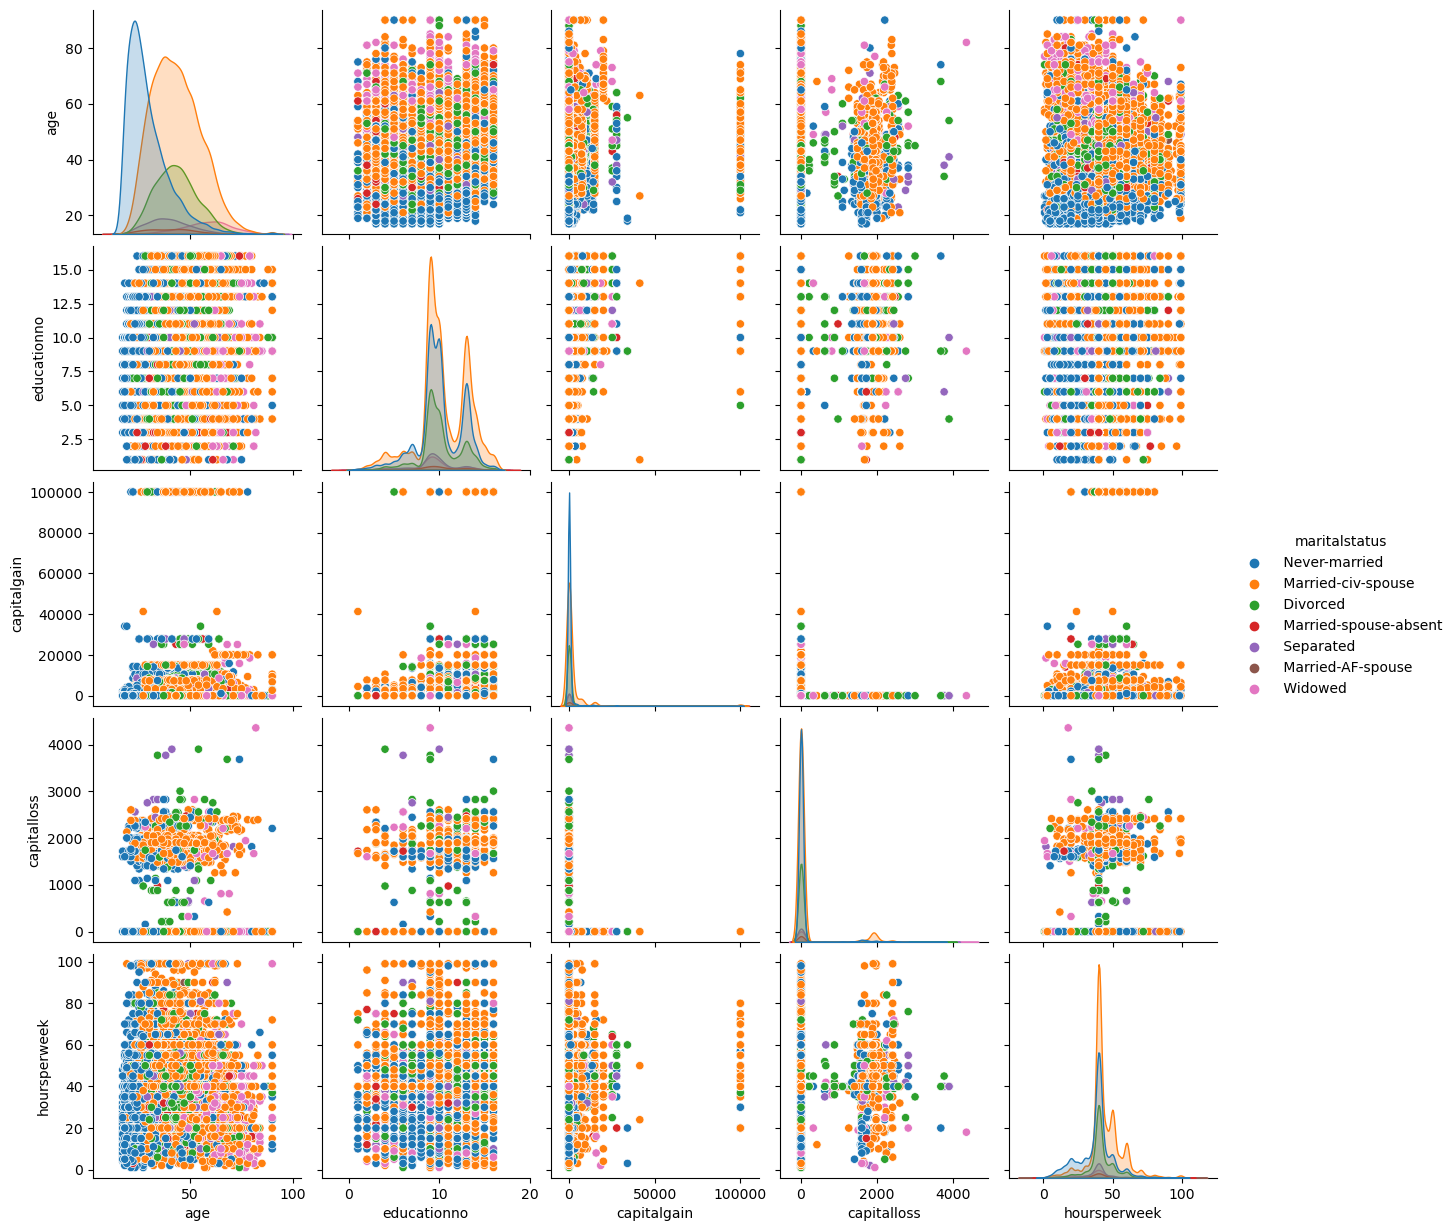

In [19]:
# Ploting pairplot
sns.pairplot(data=df_train, hue='maritalstatus')

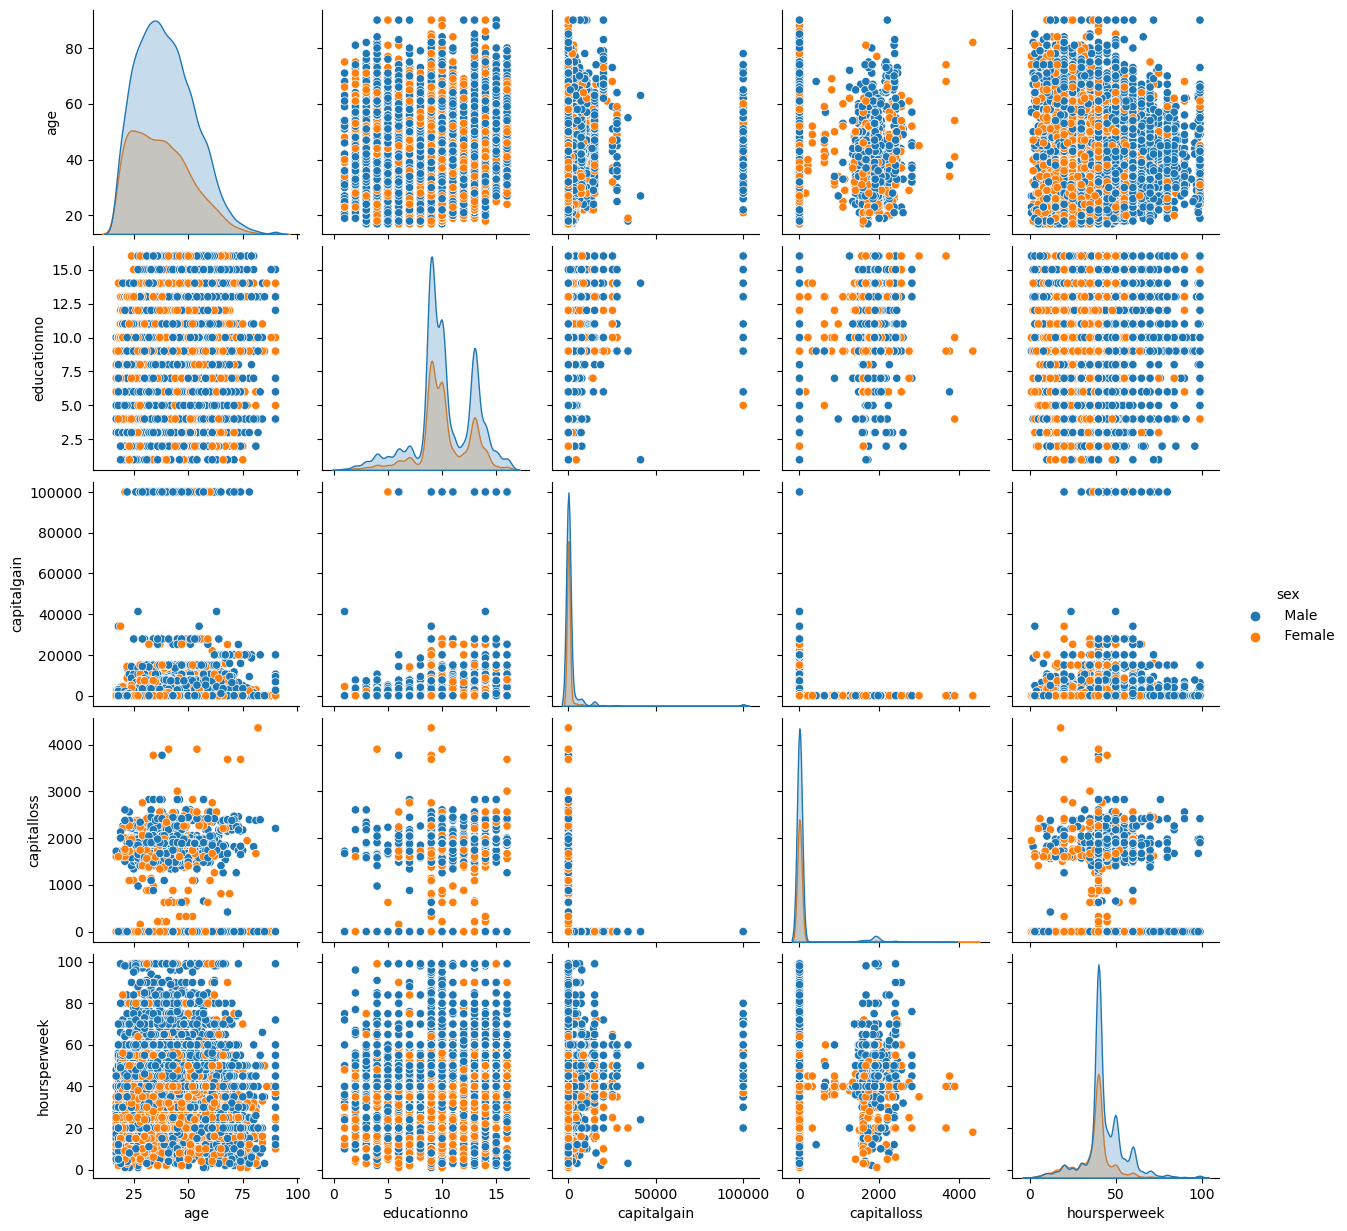

In [20]:
sns.pairplot(data=df_train, hue='sex')

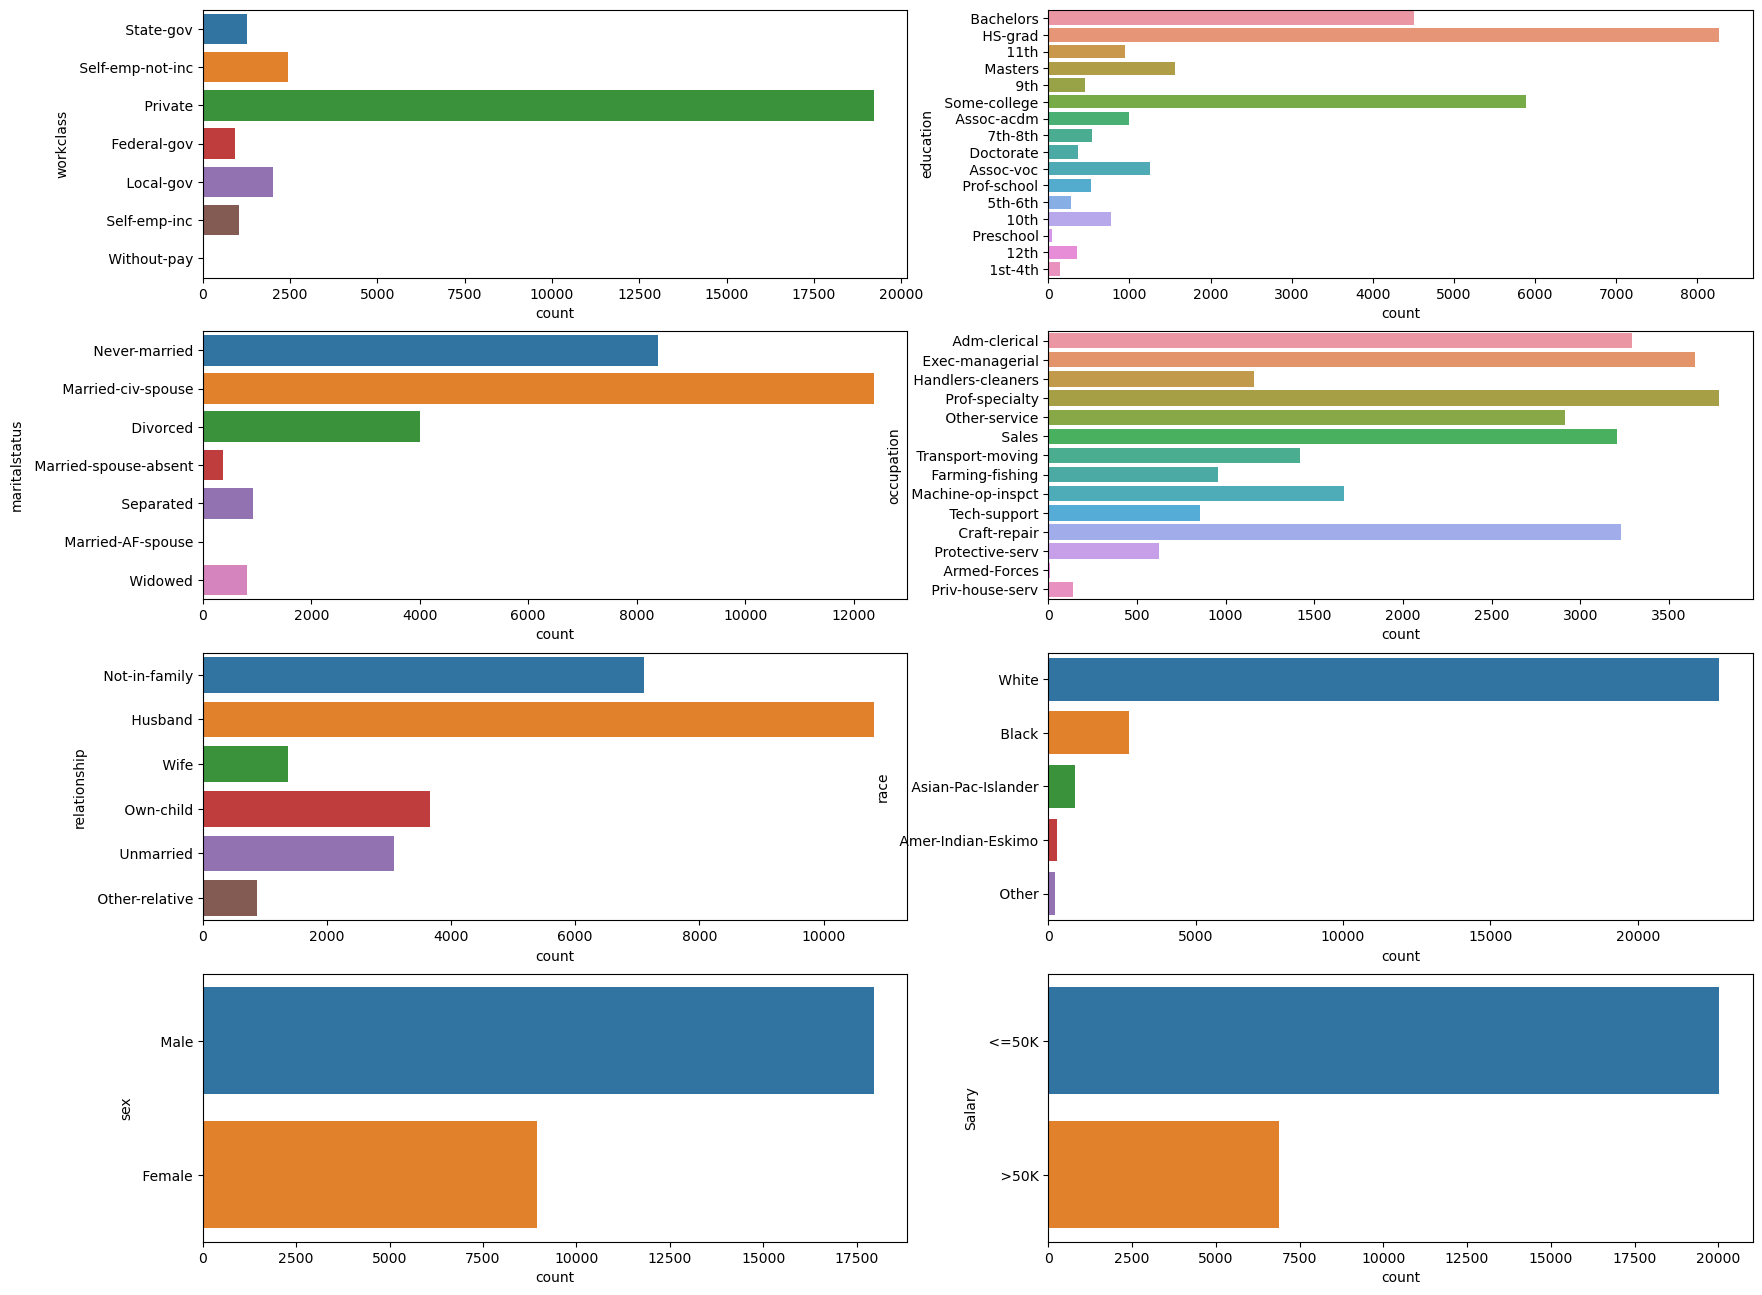

In [21]:
# Ploting Countolot for Categorical data in train data
plt.subplots(figsize=(20,16))

[plt.subplot(4,2,1), sns.countplot(data=df_train, y='workclass')]; 

[plt.subplot(4,2,2), sns.countplot(data=df_train, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=df_train, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=df_train, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=df_train, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=df_train, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=df_train, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=df_train, y='Salary')];

<Figure size 1000x1000 with 0 Axes>

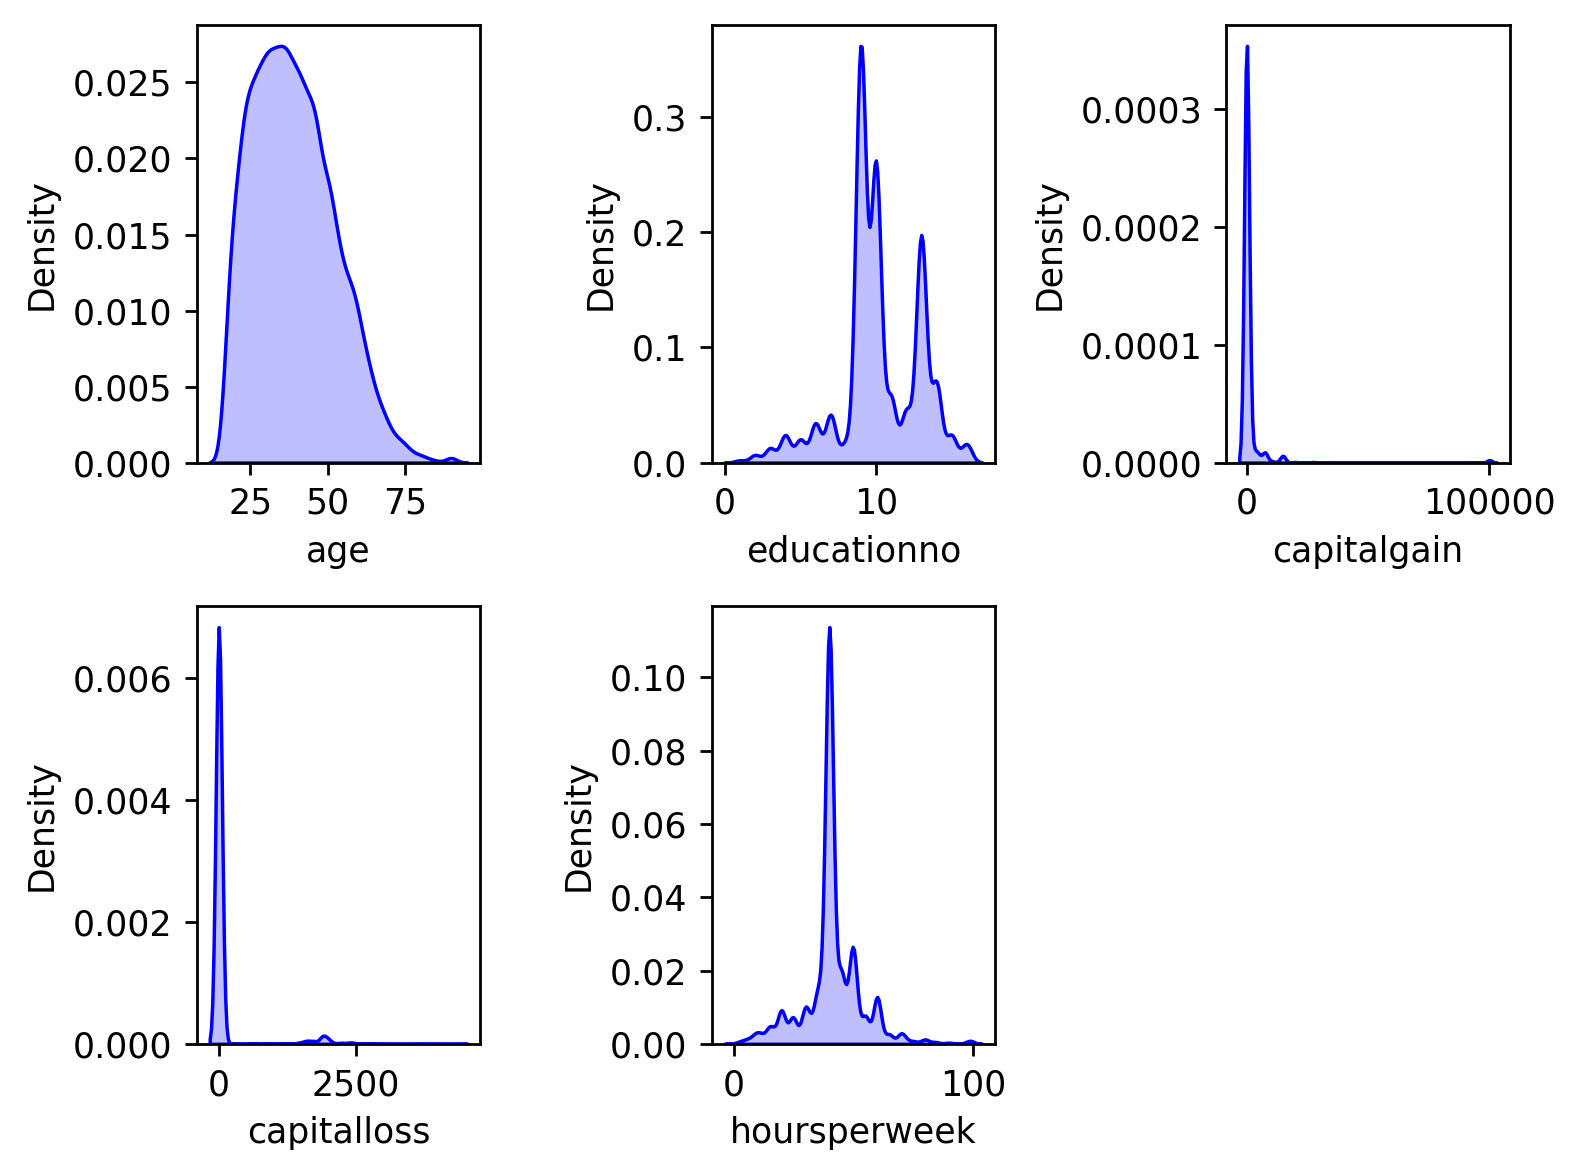

In [22]:
# Checking distribution of train data

no_columns = df_train.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(10,10))
plt.figure(dpi=250)
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(df_train[column],color='blue',shade=True)
plt.tight_layout()

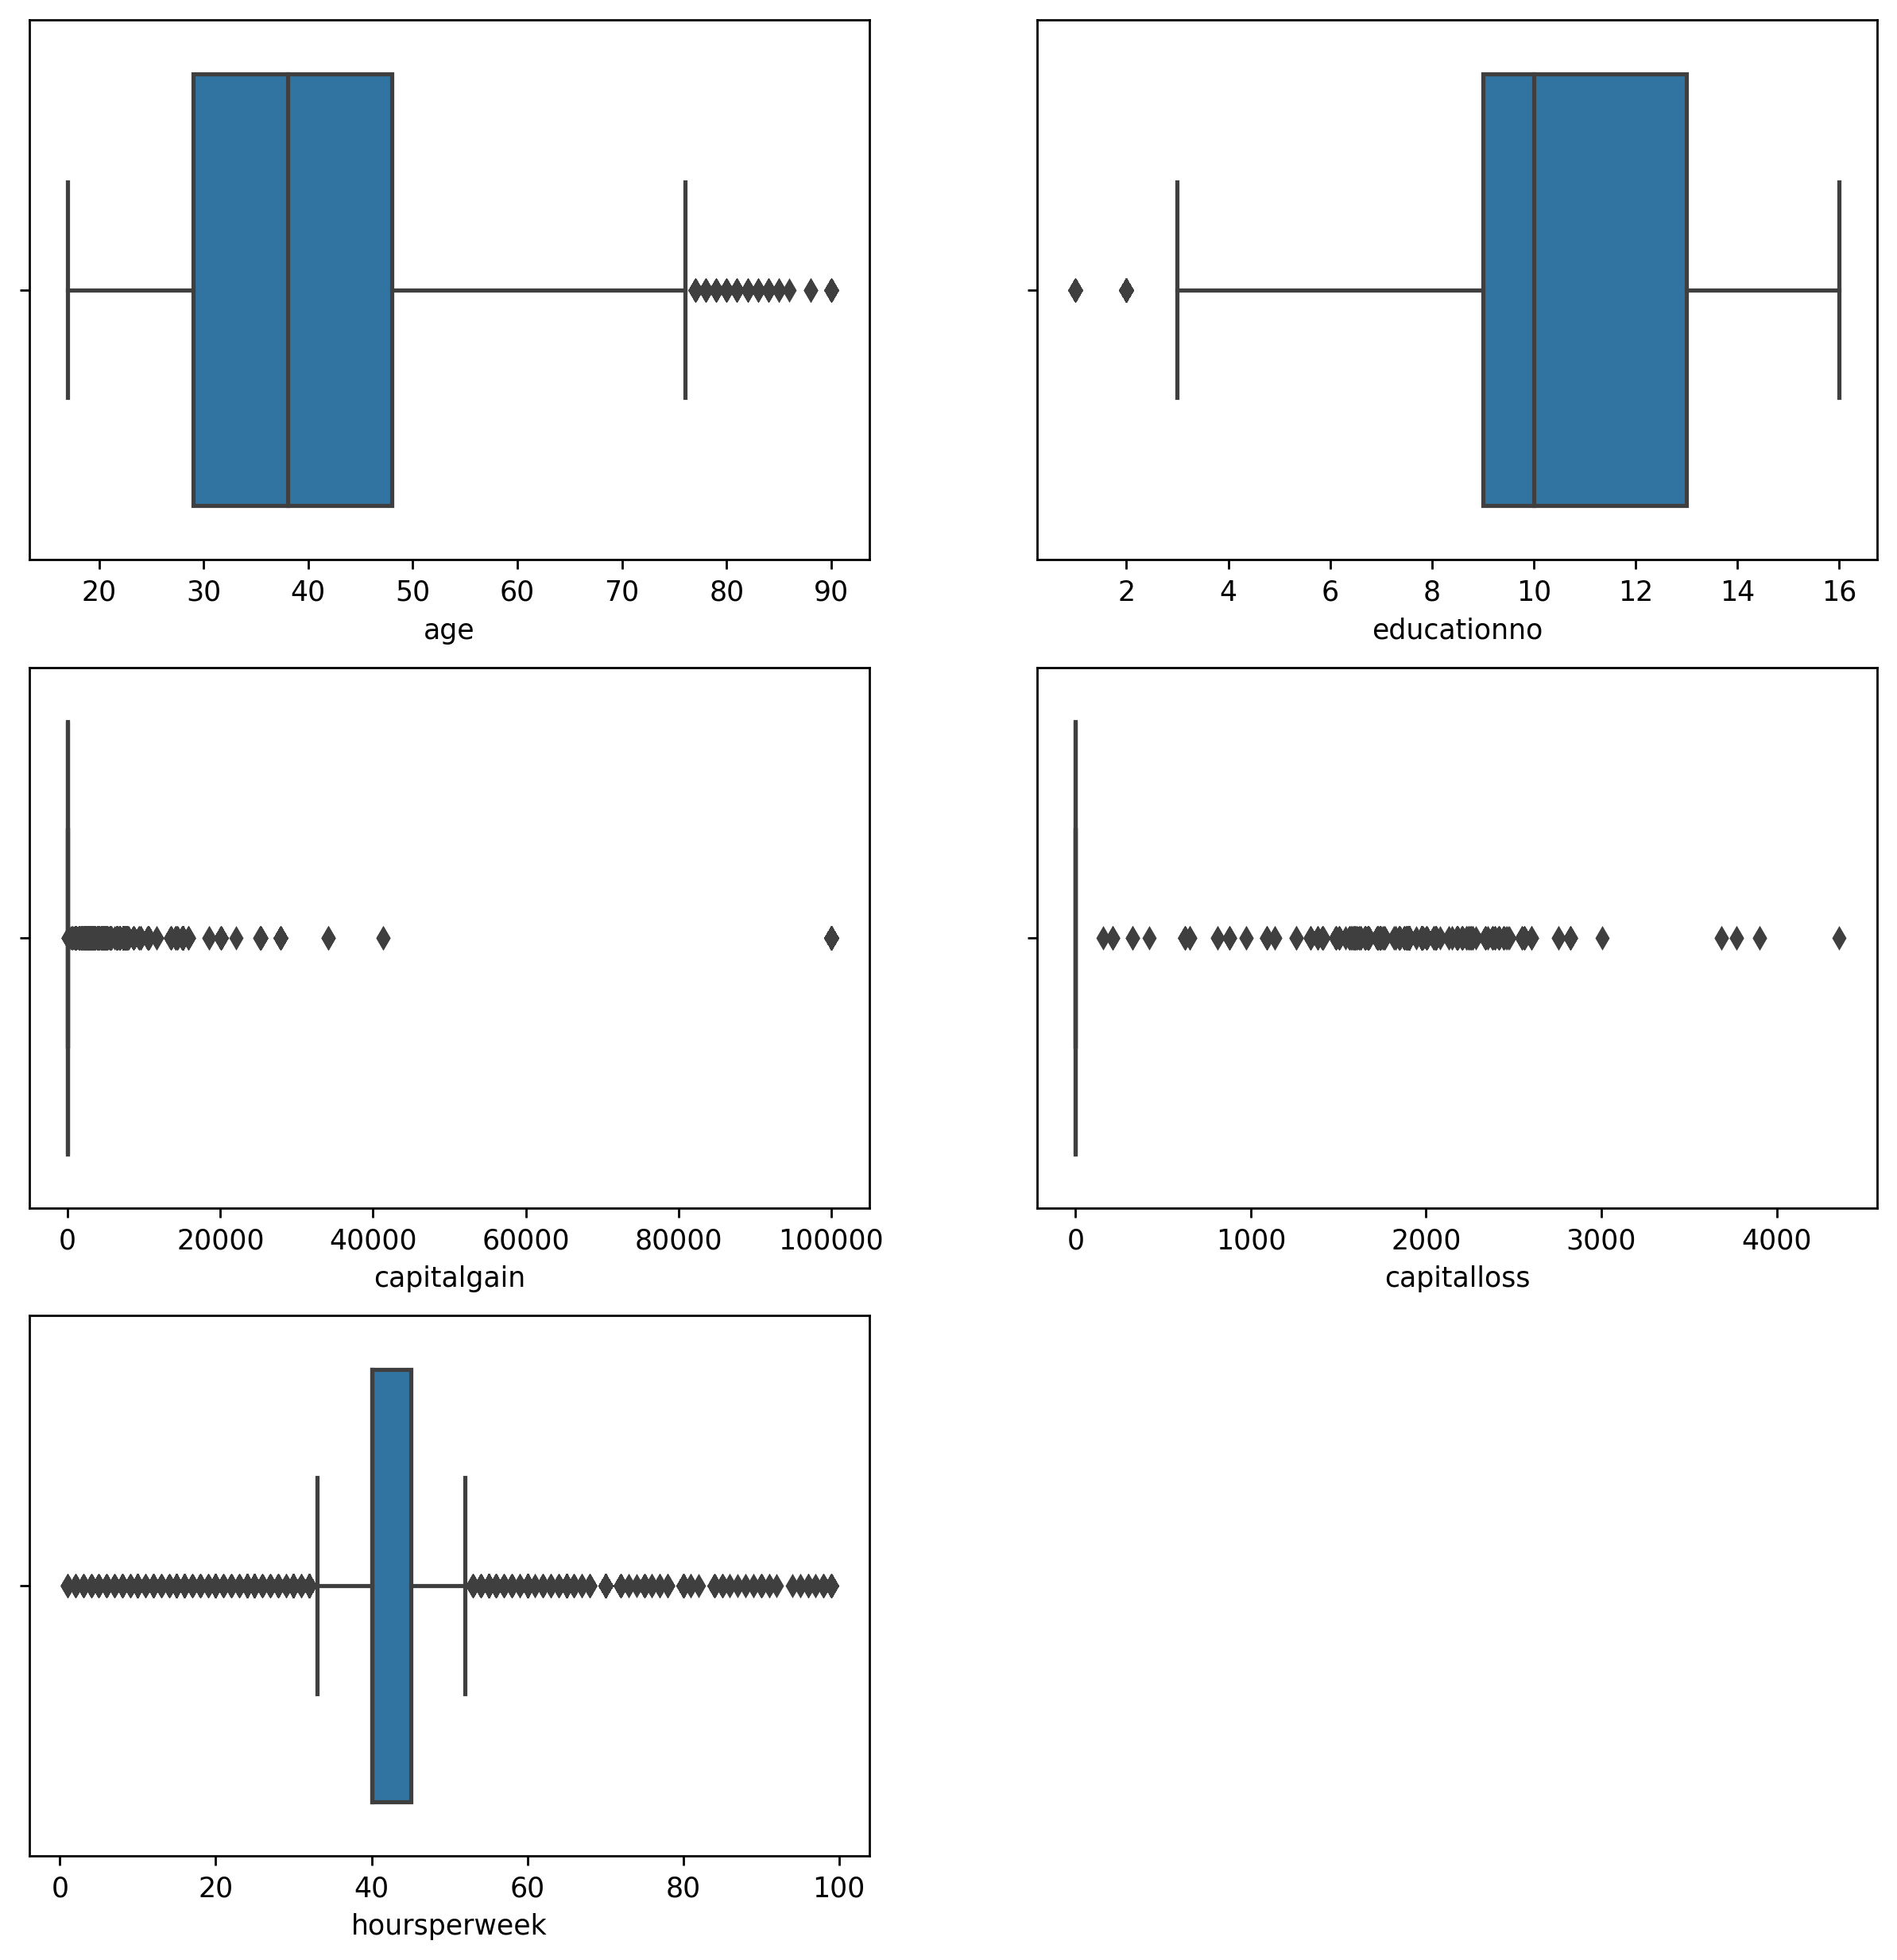

In [23]:
# To reinforce our insights about the train data symmetry and their outliers, we can plot some boxplots

plt.figure(figsize=(12,12),dpi=250)

[plt.subplot(3,2,1), sns.boxplot(x=df_train["age"])]; #Outliers in "age" column

[plt.subplot(3,2,2), sns.boxplot(x=df_train["educationno"])]; #Outliers in "educationno" column

[plt.subplot(3,2,3), sns.boxplot(x=df_train["capitalgain"])]; #Outliers in "capitalgain" column

[plt.subplot(3,2,4), sns.boxplot(x=df_train["capitalloss"])]; #Outliers in "capitalloss" column

[plt.subplot(3,2,5), sns.boxplot(x=df_train["hoursperweek"])]; #Outliers in "hoursperweek" column

**Label Encoding :**

In [24]:
le = LabelEncoder()

In [25]:
train_cat_col = df_train.select_dtypes(include=[object]).columns

test_cat_col = df_test.select_dtypes(include=[object]).columns

In [26]:
df_train[train_cat_col] = df_train[train_cat_col].apply(lambda col : le.fit_transform(col))

df_test[test_cat_col] = df_test[test_cat_col].apply(lambda col : le.fit_transform(col))

In [27]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [28]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [29]:
df_train = df_train.astype(int)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [30]:
df_test = df_test.astype(int)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


**Model Building :**

In [31]:
# Training data
xtrain = df_train.iloc[:,:-1]
ytrain = df_train['Salary']

# Testing data
xtest = df_test.iloc[:,:-1]
ytest = df_test['Salary']

***Naive Bayes classifier for multinomial models :***

In [32]:
mnb = MultinomialNB()

# Fitting data into multinominal model
mnb.fit(xtrain,ytrain)

# Prediction of xtest
ypred_mnb = mnb.predict(xtest)
ypred_mnb

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
# Confusion matrix
confusion_matrix(ytest,ypred_mnb)

array([[10151,   469],
       [ 2733,   777]], dtype=int64)

In [34]:
pd.crosstab(ytest.values.flatten(),mnb)

col_0,MultinomialNB()
row_0,
0,10620
1,3510


In [35]:
print("Train Score :",mnb.score(xtrain,ytrain))
print("Test Score :",mnb.score(xtest,ytest))
print(classification_report(ytest,ypred_mnb))

Train Score : 0.7683158012117608
Test Score : 0.7733899504600141
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     10620
           1       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130



In [36]:
print("Model Accuracy :",accuracy_score(ytest,ypred_mnb))

Model Accuracy : 0.7733899504600141


***Gaussian Naive Bayes :***

In [37]:
gnb = GaussianNB()

# Fitting data into Gaussian Naive Bayes 
gnb.fit(xtrain,ytrain)

# Prediction with xtest
ypred_gnb = gnb.predict(xtest)
ypred_gnb

array([0, 0, 0, ..., 0, 1, 0])

In [38]:
# Confusion matrix
confusion_matrix(ytest,ypred_gnb)

array([[10056,   564],
       [ 2330,  1180]], dtype=int64)

In [39]:
pd.crosstab(ytest.values.flatten(),gnb)

col_0,GaussianNB()
row_0,
0,10620
1,3510


In [40]:
print("Train Score :",gnb.score(xtrain,ytrain))
print("Test Score :",gnb.score(xtest,ytest))
print(classification_report(ytest,ypred_gnb))

Train Score : 0.7933687692822362
Test Score : 0.7951875442321302
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10620
           1       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg       0.78      0.80      0.77     14130



In [41]:
print("Model Accuracy :",accuracy_score(ytest,ypred_gnb))

Model Accuracy : 0.7951875442321302


***Cross Validation :***

In [45]:
# Check which algorithm is best algorithm & gives high accuracy
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MNB', MultinomialNB()))

# Test options & evalution metric
seed = 7
results = []
names = []
scoring = 'accuracy'

In [46]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle = True)
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796342 (0.006126)
KNN: 0.824777 (0.010738)
CART: 0.790098 (0.005398)
NB: 0.793703 (0.010001)
MNB: 0.768316 (0.008122)


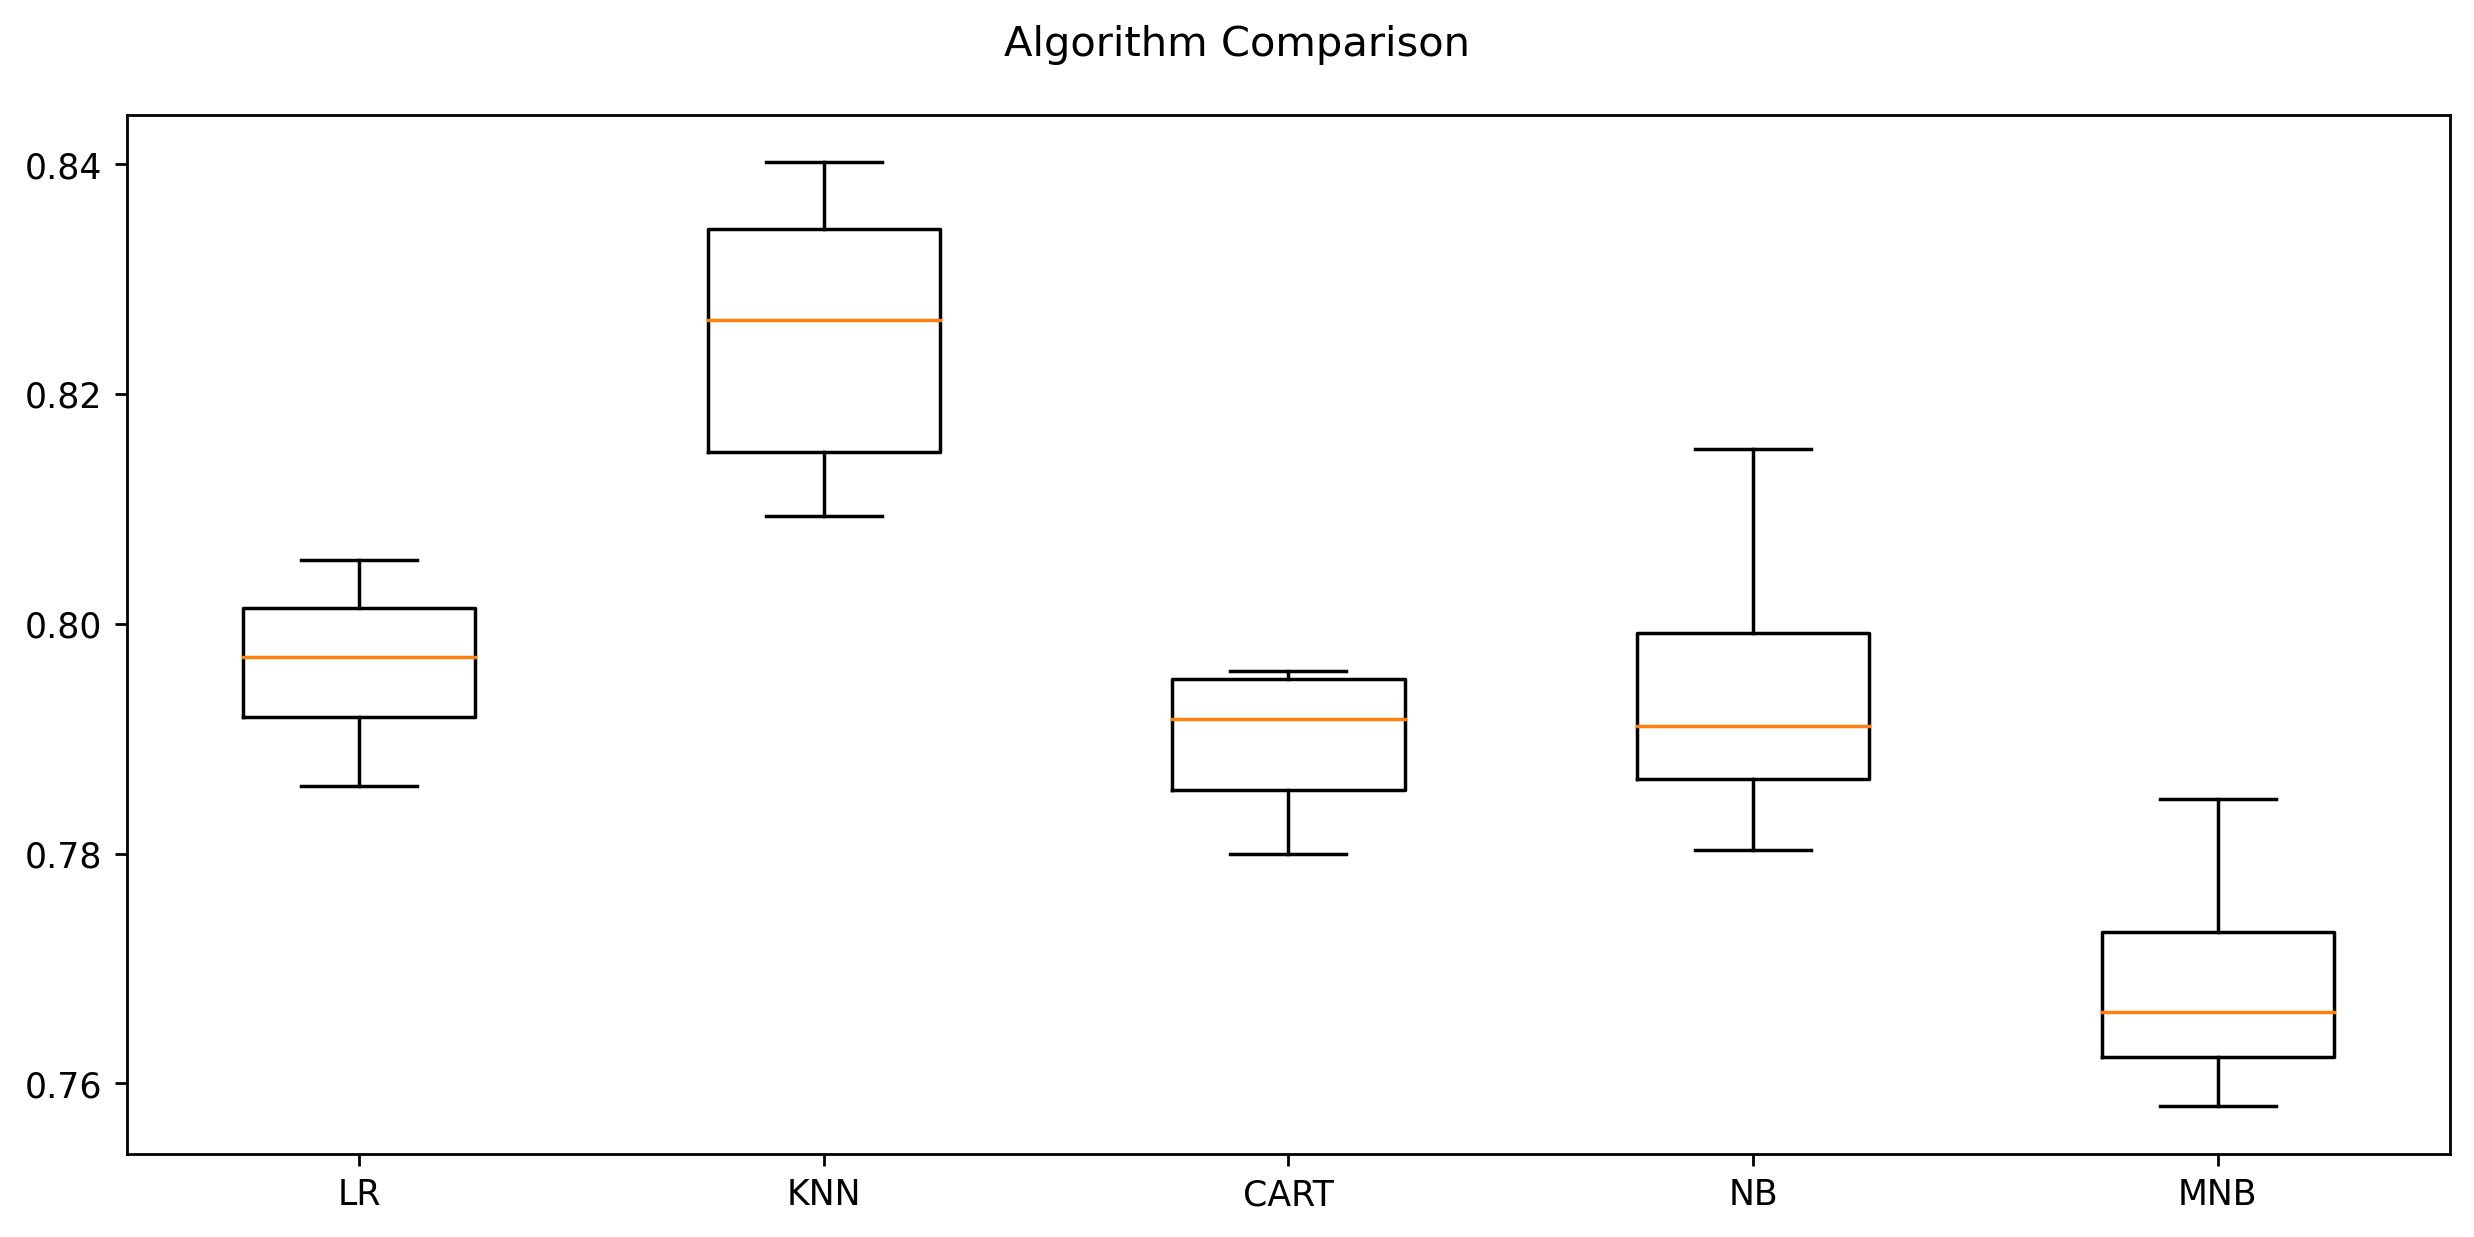

In [47]:
# Compairing each algorithms

fig = plt.figure(dpi=250,figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.tight_layout()
plt.show()

***Comparison with different algorithms for checking which algorithm gives high accuracy.***

***KNN algorithm gives high accuracy, Accuracy of KNN algorithm is 82%***